In [2]:
from PySDM_examples.Jensen_Nugent_2016 import Settings, Simulation
from open_atmos_jupyter_utils import show_plot
from PySDM.physics import si, in_unit

settings = Settings(aerosol="modified polluted", cloud_type="Sc")
simulation = Simulation(settings)
const = settings.formulae.constants

In [3]:
output = simulation.run(n_steps=2250, steps_per_output_interval=10)

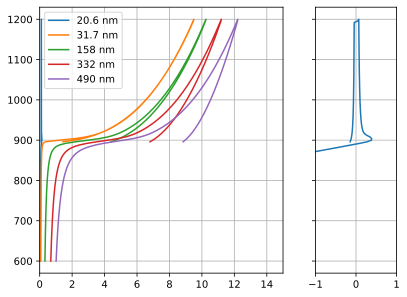

HTML(value="<a href='./Fig_3.pdf' target='_blank'>./Fig_3.pdf</a><br>")

In [4]:
from matplotlib import pyplot
import numpy as np

fig, axs = pyplot.subplot_mosaic([["r", "S"]], width_ratios=[3, 1], sharey=True)

axs["S"].plot(
    in_unit(np.asarray(output["products"]["S_max"]), const.PER_CENT),
    output["products"]["z"]
)
axs["S"].set_xlim(-1, 1)

for drop_id in (18, 29, 70, 89, -1):  # TODO: bug! why rightmost drop is not 500 nm ???
    axs["r"].plot(
        in_unit(np.asarray(output["attributes"]["radius"][drop_id]), si.um),
        output["products"]["z"],
        label=f"{in_unit(simulation.r_dry[drop_id], si.nm):.3g} nm"
    )
axs["r"].legend()
axs["r"].set_xlim(0, 15)

for ax in axs.values():
    ax.grid()

show_plot("Fig_3.pdf")